In [22]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import SimpleITK as sitk

EJERCICIO 1

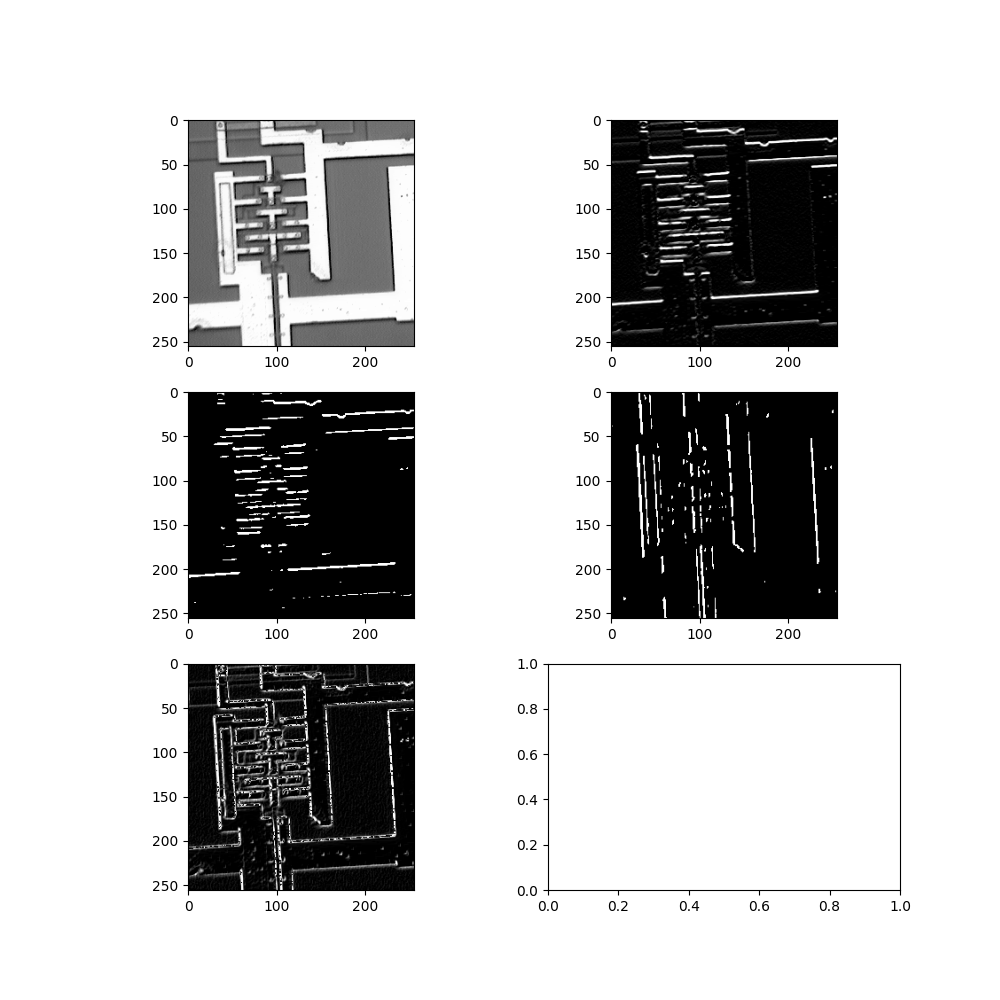

In [23]:
%matplotlib widget
img = cv.imread("imagenes/img.tif",cv.IMREAD_GRAYSCALE)

prewitt_h = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
prewitt_v = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewitt_dd = np.array([[0,1,1],[-1,0,1],[-1,-1,0]])
prewitt_di = np.array([[-1,-1,0],[-1,0,1],[0,1,1]])

img_filt = cv.filter2D(img,-1,prewitt_h)
ret,img_thresh1 = cv.threshold(img_filt,127,255,cv.THRESH_BINARY)

img_filt2 = cv.filter2D(img,-1,prewitt_v)
ret,img_thresh2 = cv.threshold(img_filt2,127,255,cv.THRESH_BINARY)
img_thresh3=img_filt+img_filt2

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,10)) 
ax[0,0].imshow(img,cmap='gray',vmin=0,vmax=255)
ax[0,1].imshow(img_filt,cmap='gray',vmin=0,vmax=255)

ax[1,0].imshow(img_thresh1,cmap='gray',vmin=0,vmax=255)
ax[1,1].imshow(img_thresh2,cmap='gray',vmin=0,vmax=255)

ax[2,0].imshow(img_thresh3,cmap='gray',vmin=0,vmax=255)

plt.show()

c:\Users\ignac\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\image.py:484: RuntimeWarning: invalid value encountered in subtract
  A_scaled -= a_min


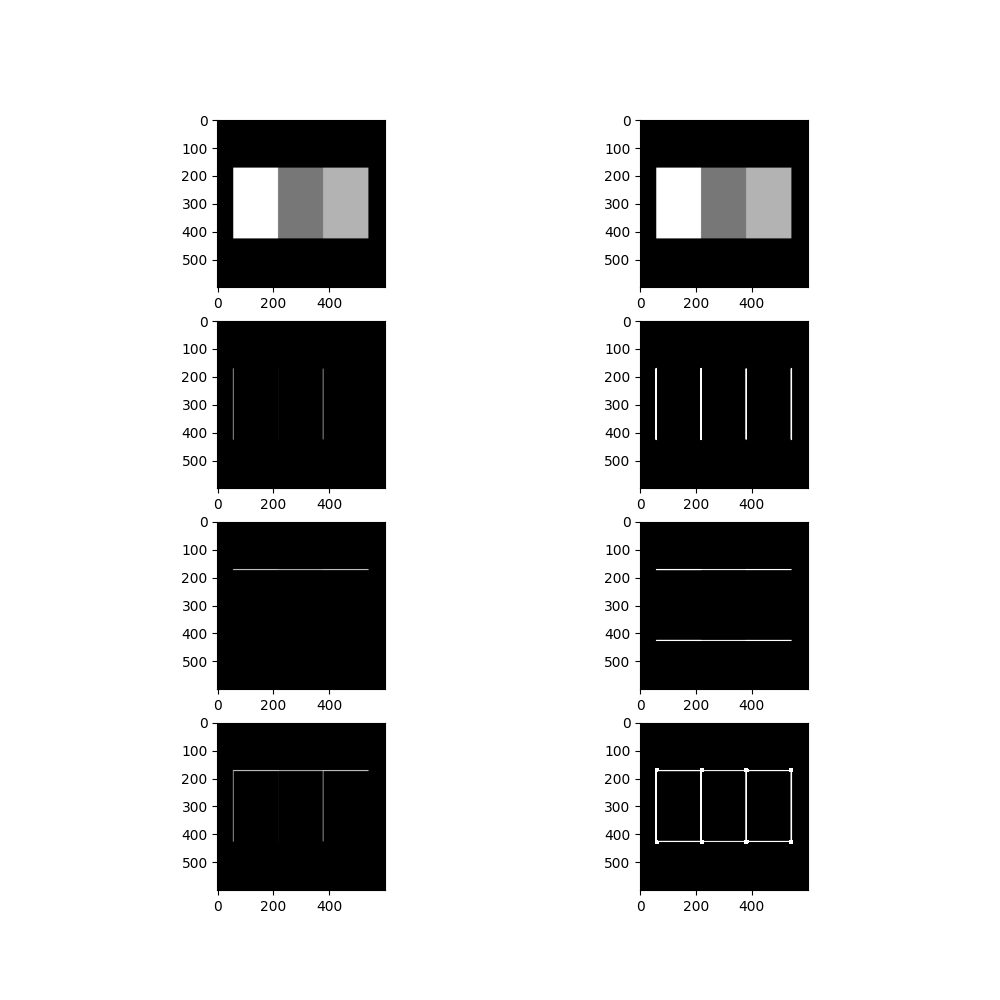

In [24]:
imagen = cv.imread("imagenes/patron_bordes.jpg",cv.IMREAD_GRAYSCALE)

imagen_sobelx = cv.Sobel(imagen,-1,1,0,ksize=3)
imagen_sobelx64 = abs(cv.Sobel(imagen,cv.CV_64F,1,0,ksize=-1))

imagen_sobely = cv.Sobel(imagen,-1,0,1,ksize=3)
imagen_sobely64 = abs(cv.Sobel(imagen,cv.CV_64F,0,1,ksize=3))

imagen_sobelxy = cv.bitwise_or(imagen_sobelx,imagen_sobely) 
imagen_sobelxy64 = cv.bitwise_or(imagen_sobelx64,imagen_sobely64) 


fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(10,10)) 
ax[0,0].imshow(imagen,cmap='gray',vmin=0,vmax=255)
ax[0,1].imshow(imagen,cmap='gray',vmin=0,vmax=255)

ax[1,0].imshow(imagen_sobelx,cmap='gray',vmin=0,vmax=255)
ax[1,1].imshow(imagen_sobelx64,cmap='gray',vmin=0,vmax=255)

ax[2,0].imshow(imagen_sobely,cmap='gray',vmin=0,vmax=255)
ax[2,1].imshow(imagen_sobely64,cmap='gray',vmin=0,vmax=255)

ax[3,0].imshow(imagen_sobelxy,cmap='gray',vmin=0,vmax=255)
ax[3,1].imshow(imagen_sobelxy64,cmap='gray',vmin=0,vmax=255)

plt.show()

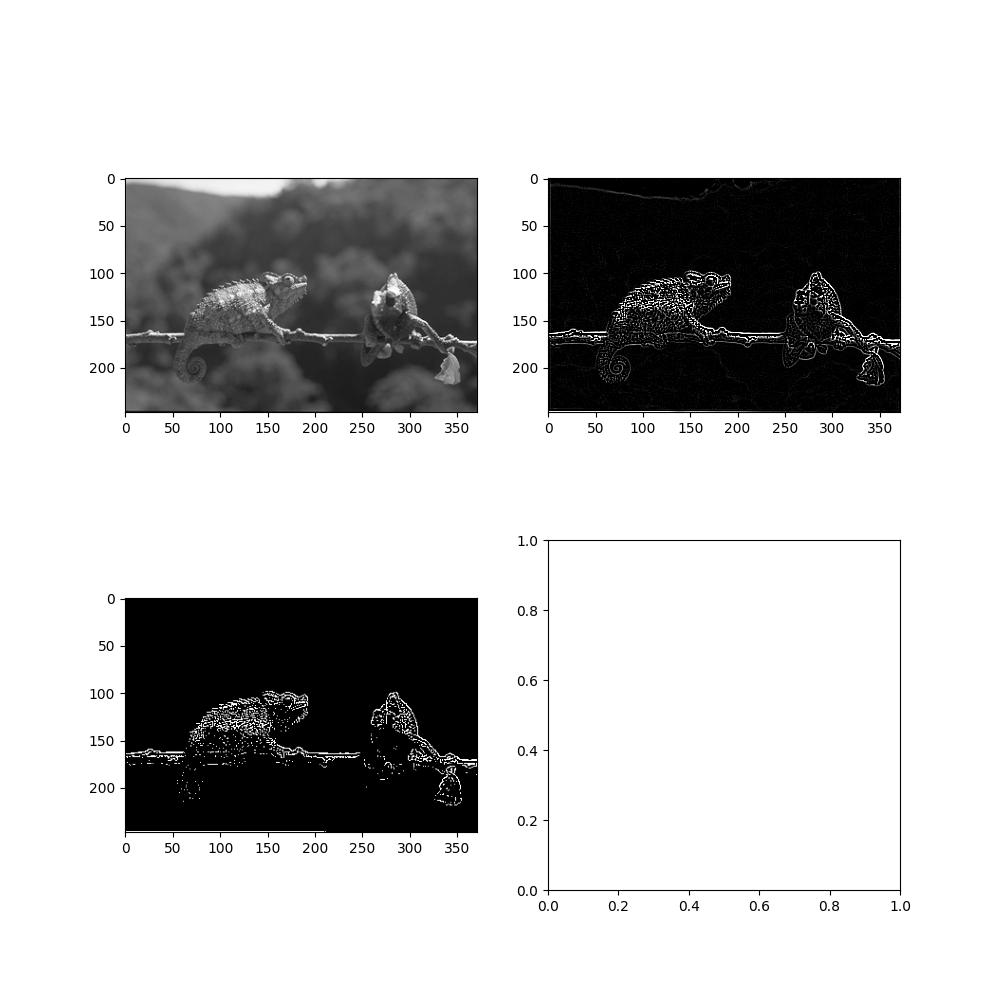

In [25]:
%matplotlib widget
img = cv.imread("imagenes/camaleon.tif",cv.IMREAD_GRAYSCALE)

img_filt = cv.Laplacian(img,cv.CV_64F,ksize=3)
ret,img_threshlapla = cv.threshold(img_filt,127,255,cv.THRESH_BINARY)


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10)) 
ax[0,0].imshow(img,cmap='gray',vmin=0,vmax=255)
ax[0,1].imshow(img_filt,cmap='gray',vmin=0,vmax=255)

ax[1,0].imshow(img_threshlapla,cmap='gray',vmin=0,vmax=255)

plt.show()

In [26]:
# cv.namedWindow("Canny",cv.WINDOW_AUTOSIZE)
# cv.waitKey(0)
# cv.desotroyAllWindows()

In [27]:
import ipywidgets as widgets
from ipywidgets import interact


def fcanny(vmin,vmax):
    bordes = cv.Canny(img,vmin,vmax)
    bordes2 = cv.Canny(img,vmin,vmax,L2gradient=True)
    fig, ax = plt.subplots(nrows=2, ncols=2) 
    ax[0,0].imshow(img,cmap="gray",vmin=0,vmax=255)
    ax[0,1].imshow(img,cmap="gray",vmin=0,vmax=255)
    ax[1,0].imshow(bordes,cmap="gray",vmin=0,vmax=255)
    ax[1,1].imshow(bordes2,cmap="gray",vmin=0,vmax=255)
    plt.show()

img = cv.imread("imagenes/camaleon.tif",cv.IMREAD_GRAYSCALE)

interact(fcanny,vmin=widgets.IntSlider(min=0,max=256,value=140),vmax=widgets.IntSlider(min=0,max=256,value=200))

interactive(children=(IntSlider(value=140, description='vmin', max=256), IntSlider(value=200, description='vma…

<function __main__.fcanny(vmin, vmax)>

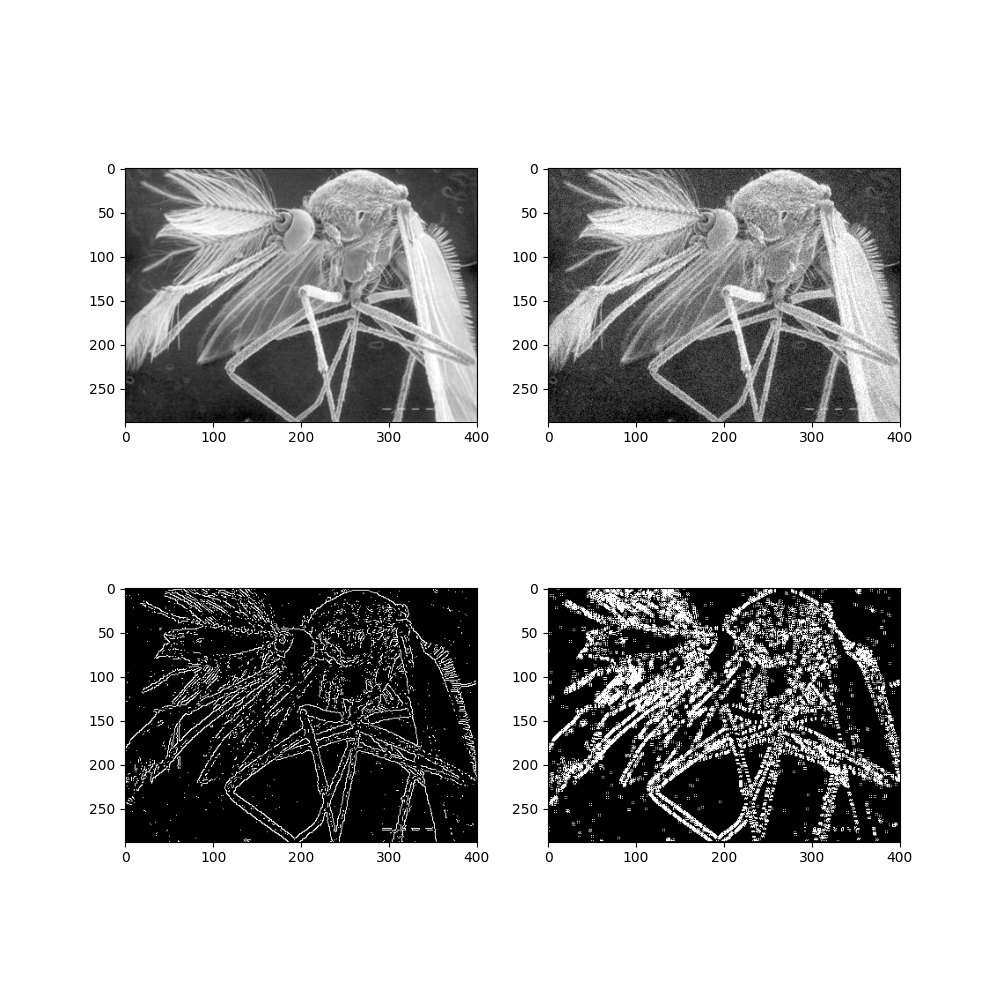

In [28]:
%matplotlib widget
mosquito = cv.imread("imagenes/mosquito.jpg",cv.IMREAD_GRAYSCALE)

#gaussian noise
mosquito_noise =mosquito + np.random.normal(0, 15, (mosquito.shape[0],mosquito.shape[1]))
mosquito_noise = np.clip(mosquito_noise, 0, 255)
mosquito_noise = mosquito_noise.astype(np.uint8)

mosquito_canny = cv.Canny(mosquito_noise,240,250)

mosquito_sobel_x = abs(cv.Sobel(mosquito_canny,cv.CV_64F,1,0,ksize=3))
mosquito_sobel_y = abs(cv.Sobel(mosquito_canny,cv.CV_64F,0,1,ksize=3))
mosquito_sobel_xy = abs(cv.Sobel(mosquito_canny,cv.CV_64F,1,1,ksize=3))


fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10,10)) 
ax[0,0].imshow(mosquito,cmap="gray",vmin=0,vmax=255)
ax[0,1].imshow(mosquito_noise,cmap="gray",vmin=0,vmax=255)

ax[1,0].imshow(mosquito_canny,cmap='gray',vmin=0,vmax=255)
ax[1,1].imshow(mosquito_sobel_xy,cmap="gray",vmin=0,vmax=255)
plt.show()

# ejecicio 2


In [29]:
%matplotlib widget
import ipywidgets as widgets
from ipywidgets import interact
import math

img = cv.imread("imagenes/building.jpg",cv.IMREAD_GRAYSCALE)

dst = cv.Canny(img, 50, 200, None)   

def hough(rho,theta,accum):
    cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
    theta2=np.radians(180-theta)

    lineas = cv.HoughLines(dst,rho,np.pi/180,accum)

    if lineas is not None:
        for line in lineas:
            rho,theta = line[0]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            
            x1 = x0 + 1000*(-b)
            y1 = y0 + 1000*(a)
            x2 = x0 - 1000*(-b)
            y2 = y0 - 1000*(a)

            pt1 = (int(x1), int(y1))
            pt2 = (int(x2), int(y2))
            
            cv.line(cdst, pt1, pt2, (0,0,255), 1, cv.LINE_AA)
        
    
    fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(9,9)) 
    ax[0,0].imshow(cdst)
    ax[0,1].imshow(img,cmap="gray")
    ax[1,0].imshow(dst,cmap="gray")
    ax[1,1].imshow(img,cmap="gray")
    plt.show()

interact(hough,rho=widgets.IntSlider(min=1,max=100,value=1),theta=widgets.IntSlider(min=0,max=180,value=90),accum=widgets.IntSlider(min=0,max=300,value=180))



interactive(children=(IntSlider(value=1, description='rho', min=1), IntSlider(value=90, description='theta', m…

<function __main__.hough(rho, theta, accum)>

In [30]:
import ipywidgets as widgets
from ipywidgets import interact
import math

img = cv.imread("imagenes/building.jpg",cv.IMREAD_GRAYSCALE)

dst = cv.Canny(img,100, 180, None)   

def houghP(rho,theta,accum,minLen,maxGap):
    cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
    theta2=np.radians(180-theta)

    lineas = cv.HoughLinesP(dst,rho,np.pi/180,accum,minLineLength=minLen,maxLineGap=maxGap)

    if lineas is not None:
        for i in range(0, len(lineas)):
            l = lineas[i][0]
            cv.line(cdst, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)
        
    
    fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(15,15)) 
    ax[0,0].imshow(cdst)
    ax[0,1].imshow(img,cmap="gray")
    ax[1,0].imshow(dst,cmap="gray")
    ax[1,1].imshow(img,cmap="gray")
    plt.show()

interact(houghP,rho=widgets.IntSlider(min=1,max=100,value=1),theta=widgets.IntSlider(min=0,max=180,value=90),accum=widgets.IntSlider(min=0,max=300,value=180,),minLen=widgets.IntSlider(min=0,max=300,value=0),maxGap=widgets.IntSlider(min=0,max=300,value=0))



interactive(children=(IntSlider(value=1, description='rho', min=1), IntSlider(value=90, description='theta', m…

<function __main__.houghP(rho, theta, accum, minLen, maxGap)>

In [65]:
from scipy.spatial import distance

def func_esfera(img,roi,R):
    BGR_roi = cv.split(roi)
    maxB=np.argmax(np.histogram(BGR_roi[0],np.arange(256))[0])
    maxG=np.argmax(np.histogram(BGR_roi[1],np.arange(256))[0])
    maxR=np.argmax(np.histogram(BGR_roi[2],np.arange(256))[0])
    H,W = img.shape[0:2]
    maskBGR = np.zeros((H,W),np.uint8)

    for i in range(H):
        for j in range(W):
            bgr_imagen = img[i][j]
            if distance.euclidean((maxB,maxG,maxR),(bgr_imagen[0],bgr_imagen[1],bgr_imagen[2])) <= R:
                maskBGR[i][j]=255
    return maskBGR
def func_cubo(img,roi,deltaHue,deltaSatu):
    
    HSV = cv.split(cv.cvtColor(roi, cv.COLOR_BGR2HSV))
    HSV_img = cv.split(cv.cvtColor(img, cv.COLOR_BGR2HSV))
    
    
    maxH=np.argmax(np.histogram(HSV[0],np.arange(256))[0])
    maxS=np.argmax(np.histogram(HSV[1],np.arange(256))[0])

    H,W = img.shape[0:2]
    maskHSV = np.zeros((H,W),np.uint8)

    for i in np.arange(H):
        for j in np.arange(W):
            pxH = HSV_img[0][i,j]
            pxS = HSV_img[1][i,j]
            if  pxH >=maxH-deltaHue and pxH <=maxH+deltaHue and pxS>=maxS-deltaSatu and pxS <=maxS+deltaSatu:
                maskHSV[i,j] = 255
    return maskHSV

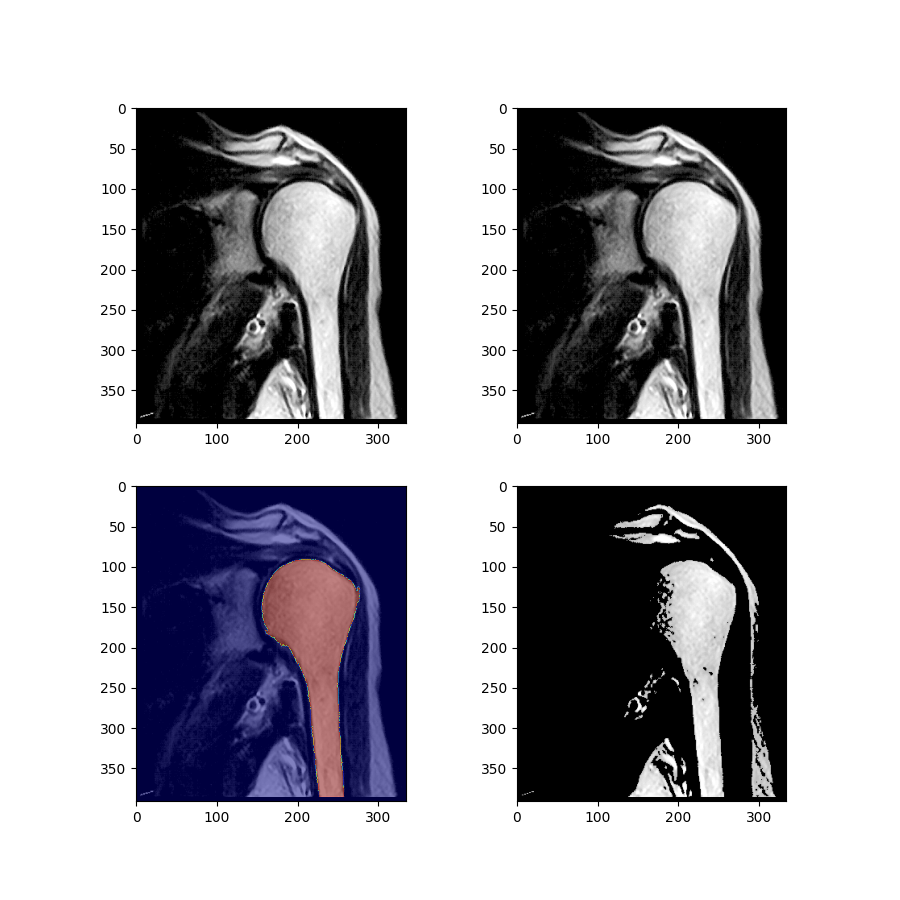

In [78]:
# Segmentación básica con SimpleITK



img = cv.imread("imagenes/bone.tif")

# Notar que nos quedamos con el canal 0 de las imagenes pq, al estar almacenadas en PNG, simpleITK las interpreta como RGB.
img_stik = sitk.VectorIndexSelectionCast(sitk.ReadImage('imagenes/bone.tif'), 0)


# UMBRALIZADO: Primero implementaremos el método de umbralizado. Para ello establecemos los límites
lower = 80
upper = 255

# REGION GROWING: Procedemos a añadir una lista de puntos semilla para los cuales se crecerá la región sobre la semillas
seedlist = [(230,120) ]

# Aqui llamaremos al método de crecimiento de regiones, indicando la posición de las semillas y los límites para el crecimiento.
seg = sitk.ConnectedThreshold(img_stik, seedList= seedlist, lower= lower , upper= upper )




roi = img[130:150,210:230]
maskBGR = func_esfera(img,roi,87)
maskHSV = func_cubo(img,roi,15,110)
RGB = cv.split(img)

imagen = cv.bitwise_and(img,img,mask=maskBGR)
imagen2 = cv.bitwise_and(img,img,mask=maskHSV)



fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(9,9)) 
ax[0,0].imshow(sitk.GetArrayFromImage(img_stik),cmap="gray")

ax[0,1].imshow(img[:,:,[2,1,0]])
ax[1,0].imshow(sitk.GetArrayFromImage(img_stik),cmap="gray")
ax[1,0].imshow(sitk.GetArrayFromImage(seg), cmap='jet', alpha=0.5)
ax[1,1].imshow(imagen[:,:,[2,1,0]])
plt.show()